In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
data = pd.read_excel("2019-2021 statewise crime rate.xlsx")
data.head()

,State/UT,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021)
0,Andhra Pradesh,119229,188997,179611,528.5,339.9,92.9
1,Arunachal Pradesh,2590,2244,2626,15.4,170.9,51.7
2,Assam,123512,111558,119883,351.6,341.0,38.2
3,Bihar,197935,194698,186006,1237.0,150.4,70.5
4,Chhattisgarh,61256,65216,70519,296.1,238.2,80.2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State/UT                                         39 non-null     object 
 1   IPC Crimes - 2019                                39 non-null     int64  
 2   IPC Crimes - 2020                                39 non-null     int64  
 3   IPC Crimes - 2021                                39 non-null     int64  
 4   Mid-Year Projected Population (in Lakhs)
(2021)  39 non-null     float64
 5   Rate of Cognizable Crimes (IPC) (2021)           39 non-null     float64
 6   Chargesheeting Rate (2021)                       39 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.3+ KB


In [31]:
data.isna().sum()

State/UT                                            0
IPC Crimes - 2019                                   0
IPC Crimes - 2020                                   0
IPC Crimes - 2021                                   0
Mid-Year Projected Population (in Lakhs)\n(2021)    0
Rate of Cognizable Crimes (IPC) (2021)              0
Chargesheeting Rate (2021)                          0
dtype: int64

In [32]:
data["IPC Crimes - 2019"] = pd.to_numeric(data["IPC Crimes - 2019"])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State/UT                                         39 non-null     object 
 1   IPC Crimes - 2019                                39 non-null     int64  
 2   IPC Crimes - 2020                                39 non-null     int64  
 3   IPC Crimes - 2021                                39 non-null     int64  
 4   Mid-Year Projected Population (in Lakhs)
(2021)  39 non-null     float64
 5   Rate of Cognizable Crimes (IPC) (2021)           39 non-null     float64
 6   Chargesheeting Rate (2021)                       39 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.3+ KB


<Axes: >

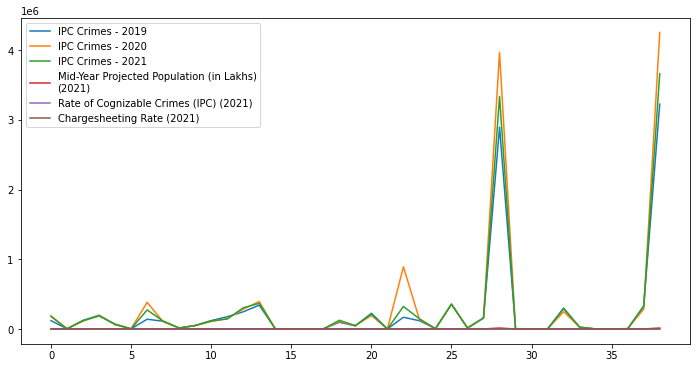

In [34]:
data.plot(figsize=(12,6))

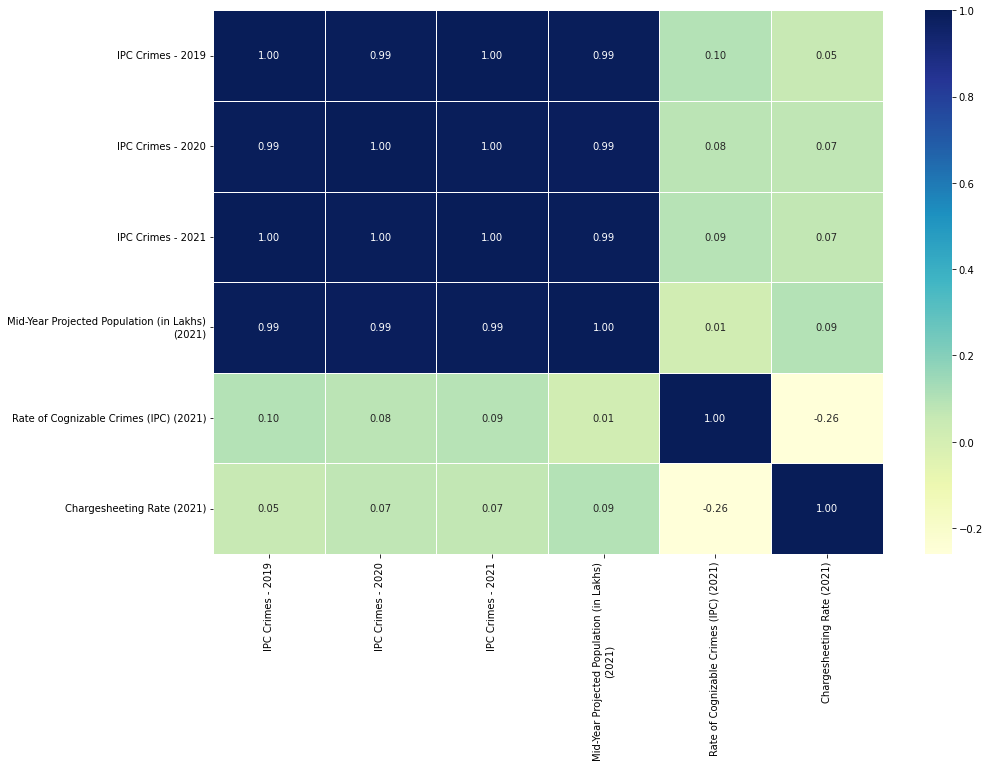

In [35]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [36]:
pd.api.types.is_string_dtype(data["State/UT"])


True

In [37]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State/UT


In [38]:
# This will convert all strings to category
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [39]:
data["State/UT"].cat.categories

Index(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'D&N Haveli and\nDaman & Diu+', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir*', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh @', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Total (States)', 'Total All India', 'Total UT(S)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [40]:
data['StateCodes'] = data["State/UT"].cat.codes

In [41]:
X = data.drop(columns=["IPC Crimes - 2021","State/UT"],axis=1)
y = data["IPC Crimes - 2021"]

In [42]:
X.head()

,IPC Crimes - 2019,IPC Crimes - 2020,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
0,119229,188997,528.5,339.9,92.9,1
1,2590,2244,15.4,170.9,51.7,2
2,123512,111558,351.6,341.0,38.2,3
3,197935,194698,1237.0,150.4,70.5,4
4,61256,65216,296.1,238.2,80.2,6


In [43]:
y.head()

0    179611
1      2626
2    119883
3    186006
4     70519
Name: IPC Crimes - 2021, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest regression

In [51]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9658950267554659

#### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9644605351508635

#### Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9662450492952064

#### Ridge Regression

In [54]:
from sklearn.linear_model import Ridge

model4 = Ridge(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.9644598569568248

#### XG Boost

In [55]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model5.fit(X_train,y_train)
model5.score(X_test,y_test)               

[11:40:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


-1.7676224422972466

In [58]:
y_preds_3 = model3.predict(X)
scores_3 = pd.DataFrame(columns=["Actual Crime Rate 2021","Predicted Crime Rate 2021"])
scores_3["Actual Crime Rate 2021"] = y
scores_3["Predicted Crime Rate 2021"] = y_preds_3
scores_3.head(10)


,Actual Crime Rate 2021,Predicted Crime Rate 2021
0,179611,179440.582201
1,2626,2650.115880
2,119883,120079.251287
3,186006,186298.677415
4,70519,49759.159391
5,2099,2112.679365
6,273056,318790.627812
7,112720,112960.456203
8,13041,12662.420704
9,47684,47623.033503


Text(0, 0.5, 'Crime Rate')

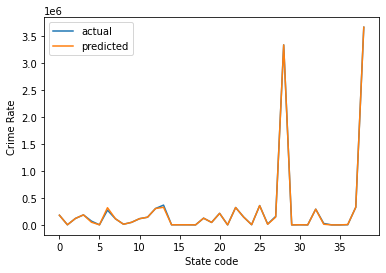

In [59]:
plt.plot(scores_3["Actual Crime Rate 2021"], label='actual')
plt.plot(scores_3["Predicted Crime Rate 2021"], label='predicted')
plt.legend()
plt.xlabel("State code")
plt.ylabel("Crime Rate")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_3)
rmse= r2_score(y, y_preds_3)
mae = mean_absolute_error(y,y_preds_3)

mse,rmse,mae

(38418.61860899319, 0.9999999331893874, 153.98029146731898)

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


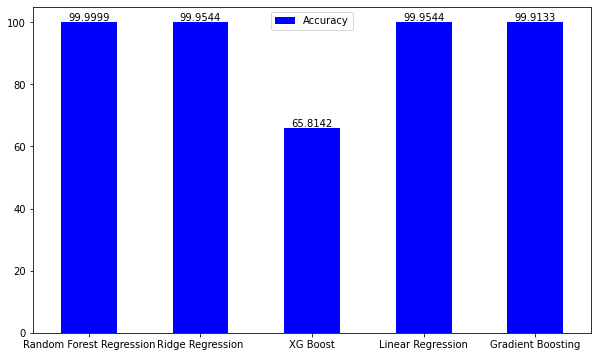

In [ ]:
model_score = {'Random Forest Regression':99.9999,
                'Ridge Regression':99.9544,
               'XG Boost':65.8142,
               'Linear Regression':99.9544,
               'Gradient Boosting':99.9133
               }

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="blue", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);
